### Aligning and plotting representative images of reference compounds
<p> The following code will generate a figure to display representative images of worm behavior in response to reference compounds from the Neuroplant screens. The representative images were chosen by IDing an the individual image for each condition that had a chemotaxis index closest to the calculated mean chemotaxis index of all 16 replicates for that condition.</p> 

#### 1. Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib as plb
import seaborn as sns
from skimage.io import imread


#### 2. Generating the figure

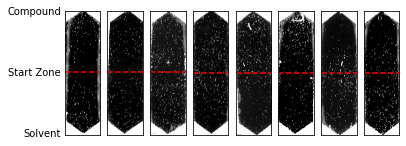

In [5]:
ref_list = ['DMSO_DMSO', 'DMSO_H2O', 'DMSO_Empty', 'MT_MT', 'DI', 'IA', '2-no', '1-oct']
labels = ['Compound', '', '', 'Start Zone', '', '', 'Solvent']
ticks = [0.0, 500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0]

#Creating a file path to read in the representative images
impath = 'C:/Users/Emily/Documents/NP_manuscript/Images/representatives/'
image_folder = plb.Path(impath)

fig, axes = plt.subplots(nrows=1, ncols=8, sharey=True, sharex=True)
col = 0

#Iterating over the refernce list to capture the correct image
for i in ref_list:
    im = image_folder.joinpath(i + '.tiff')
    img = imread(im)
    
    #Capturing the center of the image to align at the "start zone"
    center = (img.shape[0])/2
    
    #Setting the compound name as the title for each rendered image
    fname = im.stem
    axes[col].imshow(img/255, cmap='gray')
    #axes[col].set_title(fname)

    #Turning off unnecessary x axis values
    axes[col].xaxis.set_visible(False)
    
    #Adding a line to denote the "start zone"
    axes[col].axhline(y=center, color='r', linestyle='--')
    
    # Changing axes labels to indicate compound, start zone and solvent
    axes[col].set_yticks(ticks)
    axes[col].set_yticklabels(labels)
    axes[col].tick_params(axis=u'both', which=u'both',length=0)
    
    col += 1
plt.rcParams['svg.fonttype'] = 'none'
fig.savefig('C:/Users/Emily/Documents/NP_manuscript/figs/1A_ref_comps.svg', dpi=1200)